In [1]:
# Plynomial regresion
# y = b0 +b1*x1 + b2*x2^2 +....
# Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
# must check how to make bidirectional Elimination in python

In [2]:
# D:\BoxPurrelySync\Notes\Machine Learning UDEMY\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 6 - Polynomial Regression
# Importing the dataset
ws = r"Data\Polynomial Regression"
data_file = os.path.join(os.path.join(ws,"Data"),'Position_Salaries.csv')
dataset = pd.read_csv(data_file)
pd.DataFrame(dataset)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
# splitting the dataset
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
# y array([  45000,   50000,   60000,   80000,  110000,  150000,  200000, 300000,  500000, 1000000], dtype=int64)
# X array([[ 1], [ 2],[ 3],[ 4],[ 5],[ 6],[ 7],[ 8],[ 9],[10]], dtype=int64)

In [48]:
# creating a simple linear regression to compare
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# No need for feature scaling on polynomial regression ?
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
# x_poly array([[  1.,   1.,   1.], [  1.,   2.,   4.], [  1.,   3.,   9.],[  1.,   4.,  16.],[  1.,   5.,  25.],   [  1.,   6.,  36.],       [  1.,   7.,  49.],       [  1.,   8.,  64.],       [  1.,   9.,  81.],       [  1.,  10., 100.]])
# x_poly is combined from ones col, given col, and square of given col.
# now can create a new linear regression of the x_poly matrix

In [49]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

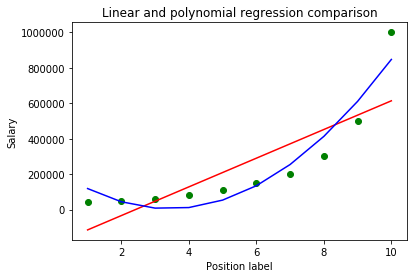

In [50]:
# Visual display the linar regression result and polynomial regression result
plt.scatter(X, y, color="green")
plt.plot(X, lin_reg.predict(X), color = "red")
# plt.plot(X, lin_reg_2.predict(X), color = "blue") # must pas polynomial terms
# must pass x_poly
# good coding to pass the trasform so it can be able to predict for any given matrix and show matrix
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "blue")
plt.title("Linear and polynomial regression comparison")
plt.xlabel("Position label")
plt.ylabel("Salary")
plt.show()


In [51]:
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([189498.10606061])

In [55]:
# 3rd degree polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg_deg3 = PolynomialFeatures(degree = 3)
x_poly_deg3 = poly_reg_deg3.fit_transform(X)


In [56]:
# x_poly array([[  1.,   1.,   1.], [  1.,   2.,   4.], [  1.,   3.,   9.],[  1.,   4.,  16.],[  1.,   5.,  25.],   [  1.,   6.,  36.],       [  1.,   7.,  49.],       [  1.,   8.,  64.],       [  1.,   9.,  81.],       [  1.,  10., 100.]])
# x_poly is combined from ones col, given col, and square of given col.
# now can create a new linear regression of the x_poly matrix
lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_poly_deg3, y)
# must see to combine this with bidirectional regression prediction

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

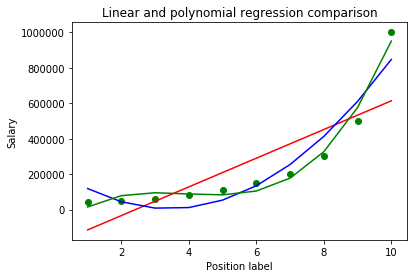

In [57]:
# Visual display the linar regression result and polynomial regression result
plt.scatter(X, y, color="green")
plt.plot(X, lin_reg.predict(X), color = "red")
# plt.plot(X, lin_reg_2.predict(X), color = "blue") # must pas polynomial terms
# must pass x_poly
# good coding to pass the trasform so it can be able to predict for any given matrix and show matrix
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "blue")
plt.plot(X, lin_reg_3.predict(poly_reg_deg3.fit_transform(X)), color = "green")
plt.title("Linear and polynomial regression comparison")
plt.xlabel("Position label")
plt.ylabel("Salary")
plt.show()

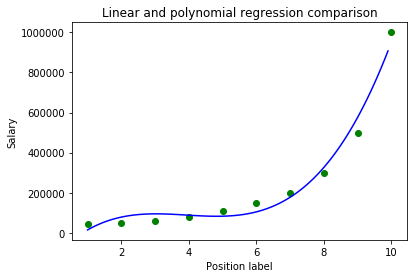

In [61]:
# Visual display the linar regression result and polynomial regression result
plt.scatter(X, y, color="green")
# plt.plot(X, lin_reg.predict(X), color = "red")
# plt.plot(X, lin_reg_2.predict(X), color = "blue") # must pas polynomial terms
# must pass x_poly
# good coding to pass the trasform so it can be able to predict for any given matrix and show matrix
# plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "blue")
# x_grid is amore dense x array to smother the 3rd degree plotted line
x_grid = np.arange(min(X), max(X), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.plot(x_grid, lin_reg_3.predict(poly_reg_deg3.fit_transform(x_grid)), color = "blue")
plt.title("Linear and polynomial regression comparison")
plt.xlabel("Position label")
plt.ylabel("Salary")
plt.show()

In [64]:
# predict a new result
def predict(position, method):
    if int(method) == 1 or str(method).lower() == "linear":
        return lin_reg.predict(position)
    elif int(method) == 2 or str(method).lower() == "quadratic":
        return lin_reg_2.predict(poly_reg.fit_transform(position))
    elif int(method) == 3 or str(method).lower() == "cubic":
        return lin_reg_3.predict(poly_reg_deg3.fit_transform(position))
    else:
        raise Exception('No valid method given')
    

In [69]:
predict(6.5,1)

array([330378.78787879])